## Clustering
* K Means
* Homogeneity, Completeness and V-Measure
* Vector Quantization
* Affinity Propagation
* Mean Shift
* Density Based Spatial Clustering of Applications with Noise(DBSCAN)
* Spectral Clustering

### K Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import KMeans

def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

In [2]:

N = 400
centers = 4

# Create three data sets : data, data2, data3
# Generate isotropic Gaussian blobs for clustering with 4 centeres 
data, y = ds.make_blobs(N, n_features=2, centers=centers, random_state=2)  # random number

# data with different standard deviation
data2, y2 = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=(1,2.5,0.5,2), random_state=2)

# data with different sample sizes for different clusters
data3 = np.vstack((data[y == 0][:], data[y == 1][:50], data[y == 2][:20], data[y == 3][:5]))
y3 = np.array([0] * 100 + [1] * 50 + [2] * 20 + [3] * 5)
# help(ds.make_blobs)
print('data \n', data[1:10])
print('y \n', y)
print('data3 \n', data3[1:10])
print('y3 \n', y3)

data 
 [[ -5.98733291   1.09319552]
 [ -3.32042501  -9.43521984]
 [ -6.95990143   1.48643384]
 [ -0.51581431  -2.95589335]
 [ -6.98576681   2.3764377 ]
 [ -5.80752805  -0.01880673]
 [ -2.3875164   -3.79858985]
 [ -1.50834952 -11.55108763]
 [ -0.31932001  -8.72310502]]
y 
 [0 3 0 3 2 3 3 2 0 0 1 3 1 2 1 0 1 0 3 1 2 1 0 1 2 1 0 2 0 3 0 2 2 0 1 3 0
 3 0 1 1 3 0 2 1 0 3 1 1 3 2 0 0 3 1 0 1 3 3 1 2 1 1 2 1 2 1 2 1 2 2 1 3 2
 3 2 2 1 0 2 3 3 3 1 1 2 0 3 3 2 1 2 0 0 2 1 1 2 3 1 1 2 2 0 1 3 3 2 3 1 3
 3 1 2 1 1 1 2 0 0 2 3 2 2 0 2 2 2 2 2 0 0 2 0 1 0 1 0 3 1 2 3 2 0 0 3 1 0
 0 0 0 2 0 1 3 2 2 3 1 2 0 0 0 2 2 0 3 1 0 0 3 1 1 0 0 3 2 3 1 1 2 3 3 1 1
 0 0 1 0 1 3 2 3 0 3 2 2 3 0 1 1 2 0 3 1 3 0 3 1 1 3 3 0 3 2 1 2 3 0 2 0 3
 3 2 0 2 3 3 1 2 0 1 3 2 3 3 0 0 1 0 1 0 2 3 2 0 0 0 1 1 2 2 0 3 3 0 2 0 0
 1 2 0 2 3 2 2 0 0 2 3 3 3 3 1 3 0 3 2 0 0 2 3 3 1 3 3 1 3 2 1 1 2 2 3 0 2
 2 0 1 0 2 3 0 1 2 0 3 1 3 3 3 1 1 3 1 0 3 1 0 3 1 2 0 3 0 2 0 3 0 1 1 3 3
 2 2 1 2 0 2 3 1 1 3 3 2 1 1 2 3 2 1 0 1 1 2 1 0 0 1

In [3]:
# Do K - Means Clustering
cls = KMeans(n_clusters=4, init='k-means++')
y_hat = cls.fit_predict(data)
print(type(y_hat))
print(y_hat[:10])
y2_hat = cls.fit_predict(data2)
print(y2_hat[:10])
y3_hat = cls.fit_predict(data3)
m = np.array(((1, 1), (1, 3)))
print('\n m :\n',m)
data_r = data.dot(m) # rotated data
print('data_r:\n', data_r[:10])
y_r_hat = cls.fit_predict(data_r) # 


<class 'numpy.ndarray'>
[1 2 1 2 3 2 2 3 1 1]
[1 2 1 2 0 2 0 0 1 1]

 m :
 [[1 1]
 [1 3]]
data_r:
 [[-12.3890592  -33.20979377]
 [ -4.8941374   -2.70774636]
 [-12.75564485 -31.62608453]
 [ -5.47346759  -2.50059992]
 [ -3.47170766  -9.38349435]
 [ -4.60932911   0.14354629]
 [ -5.82633478  -5.86394823]
 [ -6.18610625 -13.78328594]
 [-13.05943714 -36.16161239]
 [ -9.04242503 -26.48863506]]


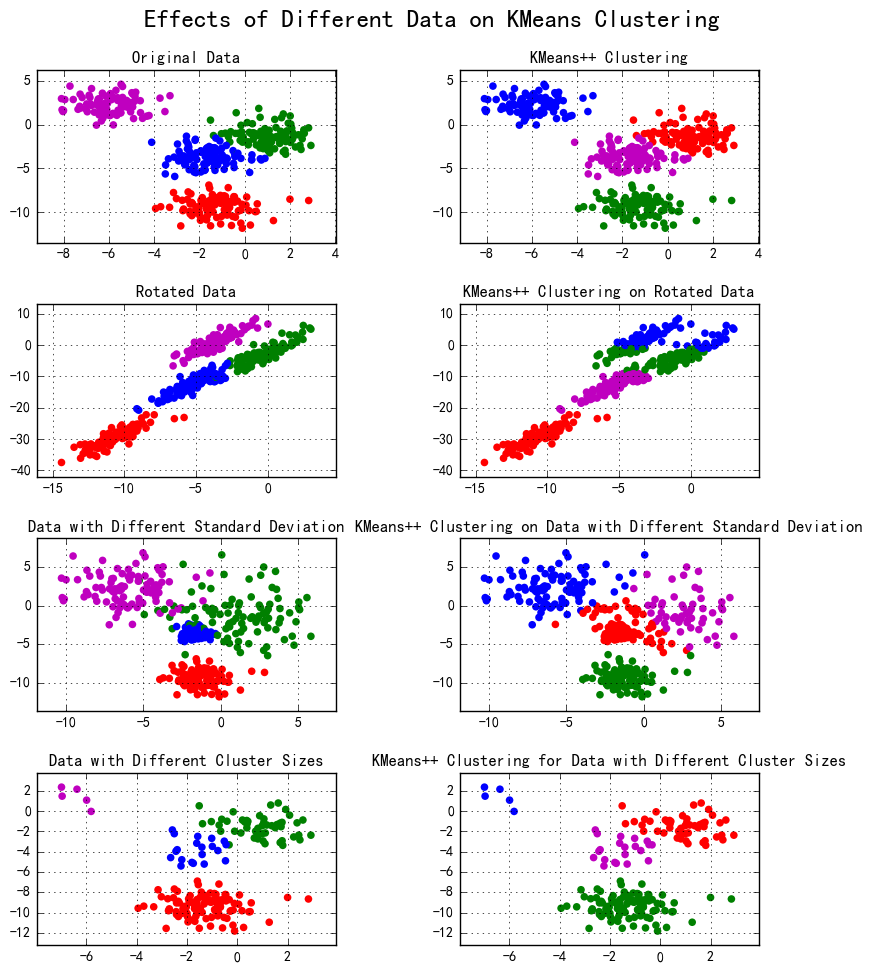

In [4]:
# plot 

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
cm = matplotlib.colors.ListedColormap(list('rgbm'))

plt.figure(figsize=(9, 10), facecolor='w')
plt.subplot(421)
plt.title(u'Original Data')
plt.scatter(data[:, 0], data[:, 1], c=y, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data, axis=0)
x1_max, x2_max = np.max(data, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(422)
plt.title(u'KMeans++ Clustering')
plt.scatter(data[:, 0], data[:, 1], c=y_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(423)
plt.title(u'Rotated Data')
plt.scatter(data_r[:, 0], data_r[:, 1], c=y, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data_r, axis=0)
x1_max, x2_max = np.max(data_r, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)
   
    
plt.subplot(424)
plt.title(u'KMeans++ Clustering on Rotated Data')
plt.scatter(data_r[:, 0], data_r[:, 1], c=y_r_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(425)
plt.title(u'Data with Different Standard Deviation')
plt.scatter(data2[:, 0], data2[:, 1], c=y2, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data2, axis=0)
x1_max, x2_max = np.max(data2, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(426)
plt.title(u'KMeans++ Clustering on Data with Different Standard Deviation')
plt.scatter(data2[:, 0], data2[:, 1], c=y2_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(427)
plt.title(u'Data with Different Cluster Sizes')
plt.scatter(data3[:, 0], data3[:, 1], s=30, c=y3, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data3, axis=0)
x1_max, x2_max = np.max(data3, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(428)
plt.title(u'KMeans++ Clustering for Data with Different Cluster Sizes')
plt.scatter(data3[:, 0], data3[:, 1], c=y3_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.tight_layout(2)
plt.suptitle(u'Effects of Different Data on KMeans Clustering', fontsize=18)
# https://github.com/matplotlib/matplotlib/issues/829
plt.subplots_adjust(top=0.92)
plt.show()


### Homogeneity, Completeness and V-Measure

In [5]:

from sklearn import metrics

y = [0, 0, 0, 1, 1, 1]
y_hat = [0, 0, 1, 1, 2, 2]

print('\n y :\n', y)
print('\n y_hat : \n', y_hat)
h = metrics.homogeneity_score(y, y_hat)
c = metrics.completeness_score(y, y_hat)
print (u'Homogeneity：', h)
print (u'Completeness：', c)
v2 = 2 * c * h / (c + h)
v = metrics.v_measure_score(y, y_hat)
print (u'V-Measure：', v2, v)

print
y = [0, 0, 0, 1, 1, 1]
y_hat = [0, 0, 1, 2, 3, 3]
print('\n y :\n', y)
print('\n y_hat : \n', y_hat)
h = metrics.homogeneity_score(y, y_hat)
c = metrics.completeness_score(y, y_hat)
v = metrics.v_measure_score(y, y_hat)
print (u'Homogeneity：', h)
print (u'Completeness：', c)
print (u'V-Measure：', v)

print
y = [0, 0, 0, 1, 1, 1]
y_hat = [1, 1, 1, 0, 0, 0]
print('\n y :\n', y)
print('\n y_hat : \n', y_hat)
h = metrics.homogeneity_score(y, y_hat)
c = metrics.completeness_score(y, y_hat)
v = metrics.v_measure_score(y, y_hat)
print (u'Homogeneity：', h)
print (u'Completeness：', c)
print (u'V-Measure：', v)

y = [0, 0, 1, 1]
y_hat = [0, 1, 0, 1]
print('\n y :\n', y)
print('\n y_hat : \n', y_hat)
ari = metrics.adjusted_rand_score(y, y_hat)
print (ari)

y = [0, 0, 0, 1, 1, 1]
y_hat = [0, 0, 1, 1, 2, 2]
print('\n y :\n', y)
print('\n y_hat : \n', y_hat)
ari = metrics.adjusted_rand_score(y, y_hat)
print (ari)



 y :
 [0, 0, 0, 1, 1, 1]

 y_hat : 
 [0, 0, 1, 1, 2, 2]
Homogeneity： 0.666666666667
Completeness： 0.420619835714
V-Measure： 0.515803742979 0.515803742979

 y :
 [0, 0, 0, 1, 1, 1]

 y_hat : 
 [0, 0, 1, 2, 3, 3]
Homogeneity： 1.0
Completeness： 0.521296028614
V-Measure： 0.685331478962

 y :
 [0, 0, 0, 1, 1, 1]

 y_hat : 
 [1, 1, 1, 0, 0, 0]
Homogeneity： 1.0
Completeness： 1.0
V-Measure： 1.0

 y :
 [0, 0, 1, 1]

 y_hat : 
 [0, 1, 0, 1]
-0.5

 y :
 [0, 0, 0, 1, 1, 1]

 y_hat : 
 [0, 0, 1, 1, 2, 2]
0.242424242424


### Vector Quantization

In [10]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D




def show_scatter(a):
    N = 10
    print ('Original Data：\n', a)
    density, edges = np.histogramdd(a, bins=[N,N,N], range=[(0,1), (0,1), (0,1)])
    density /= density.max()
    x = y = z = np.arange(N)
    d = np.meshgrid(x, y, z)

    fig = plt.figure(1, facecolor='w')
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(d[1], d[0], d[2], c='r', s=100*density, marker='o', depthshade=True)
    ax.set_xlabel(u'Red Vector')
    ax.set_ylabel(u'Green Vector')
    ax.set_zlabel(u'Blue Vector')
    plt.title(u'Image Color Frequency Distribution', fontsize=20)

    plt.figure(2, facecolor='w')
    den = density[density > 0]
    den = np.sort(den)[::-1]
    t = np.arange(len(den))
    plt.plot(t, den, 'r-', t, den, 'go', lw=2)
    plt.title(u'Image Color Frequency', fontsize=18)
    plt.grid(True)

    plt.show()


Original Data：
 [[ 0.87058824  0.53333333  0.48235294]
 [ 0.87843137  0.54117647  0.49019608]
 [ 0.89019608  0.54509804  0.49803922]
 ..., 
 [ 0.68235294  0.26666667  0.31372549]
 [ 0.70588235  0.2745098   0.31764706]
 [ 0.74117647  0.30588235  0.34117647]]


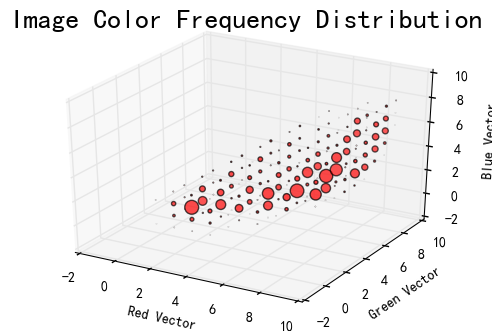

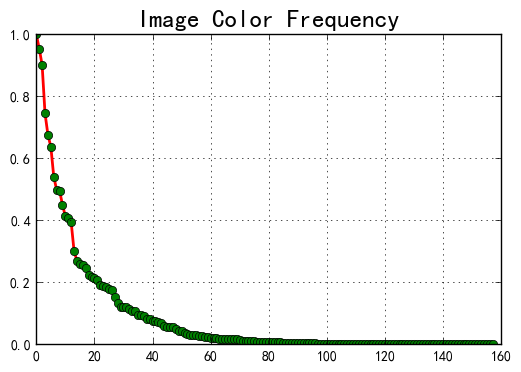

In [11]:

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

num_vq = 50
im = Image.open('Data-and-Output/16.lena.png')    
image = np.array(im).astype(np.float) / 255
image = image[:, :, :3]
image_v = image.reshape((-1, 3))
# Model 
model = KMeans(num_vq)
show_scatter(image_v)

In [21]:

def restore_image(cb, cluster, shape):
    row, col, dummy = shape
    image = np.empty((row, col, 3))
    index = 0
    for r in range(row):
        for c in range(col):
            image[r, c] = cb[cluster[index]]
            index += 1
    return image


im = Image.open('Data-and-Output/16.son.jpg')    
image = np.array(im).astype(np.float) / 255
image = image[:, :, :3]
image_v = image.reshape((-1, 3))

# Model 
num_vq = 100
model = KMeans(num_vq)

N = image_v.shape[0]    # total image 
print("N: \n", N)

idx = np.random.randint(0, N, size=2000)
image_sample = image_v[idx]
model.fit(image_sample)
c = model.predict(image_v)  # 
print ('Clustering Results：\n', c)
print ('Clustering Centers：\n', model.cluster_centers_)



N: 
 453376
Clustering Results：
 [11 11 11 ..., 92 92 92]
Clustering Centers：
 [[ 0.66496164  0.60835465  0.57442455]
 [ 0.85518613  0.86825803  0.89053708]
 [ 0.55163399  0.38039216  0.26535948]
 [ 0.79439776  0.73109244  0.67394958]
 [ 0.10588235  0.04705882  0.02745098]
 [ 0.55755479  0.47151096  0.4071511 ]
 [ 0.81129412  0.79513725  0.78415686]
 [ 0.88652482  0.91589487  0.93825615]
 [ 0.72189542  0.67761438  0.66013072]
 [ 0.62894491  0.54659197  0.49467787]
 [ 0.778338    0.69393091  0.60093371]
 [ 0.83278431  0.81584314  0.8054902 ]
 [ 0.81922525  0.81358202  0.83280727]
 [ 0.31686275  0.2054902   0.13254902]
 [ 0.72710496  0.71695502  0.77301038]
 [ 0.40196078  0.27908497  0.20196078]
 [ 0.87486631  0.79607843  0.6916221 ]
 [ 0.75392157  0.61715686  0.50441176]
 [ 0.78025693  0.74577417  0.7280595 ]
 [ 0.91287966  0.9420223   0.9787005 ]
 [ 0.8722549   0.89647059  0.92392157]
 [ 0.59607843  0.49003268  0.40588235]
 [ 0.55828877  0.44919786  0.36381462]
 [ 0.84640523  0.8410831

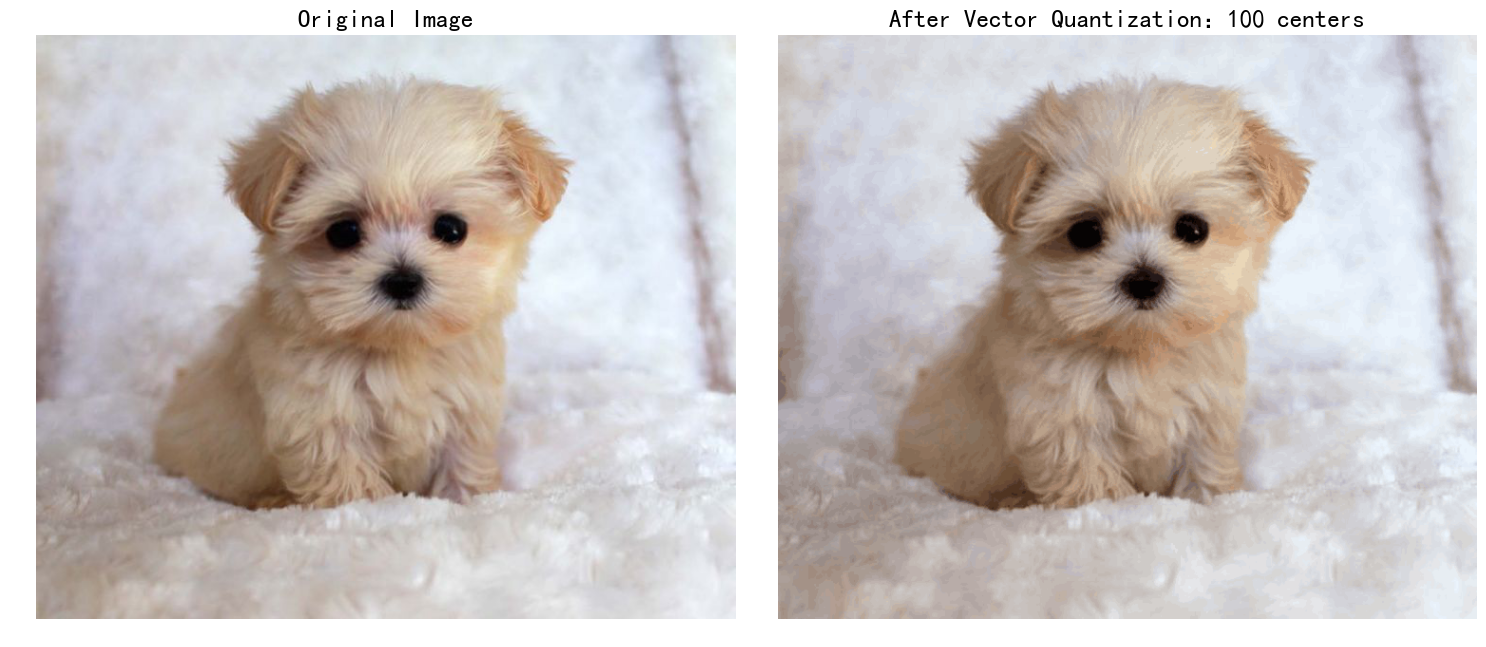

In [25]:
# plot
plt.figure(figsize=(15, 8), facecolor='w')
plt.subplot(121)
plt.axis('off')
plt.title(u'Original Image', fontsize=18)
plt.imshow(image)
# plt.savefig('1.png')

plt.subplot(122)
vq_image = restore_image(model.cluster_centers_, c, image.shape)
plt.axis('off')
plt.title(u'After Vector Quantization：%d centers' % num_vq, fontsize=18)
plt.imshow(vq_image)
# plt.savefig('2.png')

plt.tight_layout(1.2)
plt.show()


### Affinity Propagation

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import euclidean_distances

In [32]:
N = 400
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]

# simulate data
data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)

#  Considering the rows of data  as vectors, compute the
#  distance matrix between each pair of vectors.
m = euclidean_distances(data, squared=True)
print('m \n', m[:10])
preference = -np.median(m)
print ('Preference：', preference)
# help(euclidean_distances)

m 
 [[  0.           2.44419763  12.90957629 ...,   0.37898155   1.64602979
   23.84354726]
 [  2.44419763   0.          14.56457403 ...,   2.84356116   8.05732423
   24.36984881]
 [ 12.90957629  14.56457403   0.         ...,   8.87922914  13.83008005
    1.71839301]
 ..., 
 [  5.61529373   3.58513652   4.26309681 ...,   3.68750297  10.17254376
    9.40343713]
 [  1.25761748   0.52193134  10.26600281 ...,   1.06799123   5.30410482
   19.27458508]
 [  5.55844866   4.22810744   3.34195911 ...,   3.45989095   9.49581449
    8.30026735]]
Preference： -5.29914553034


1.0
p = 1.0
1.375
p = 1.4
1.75
p = 1.8
2.125
p = 2.1
2.5
p = 2.5
2.875
p = 2.9
3.25
p = 3.2
3.625
p = 3.6
4.0
p = 4.0


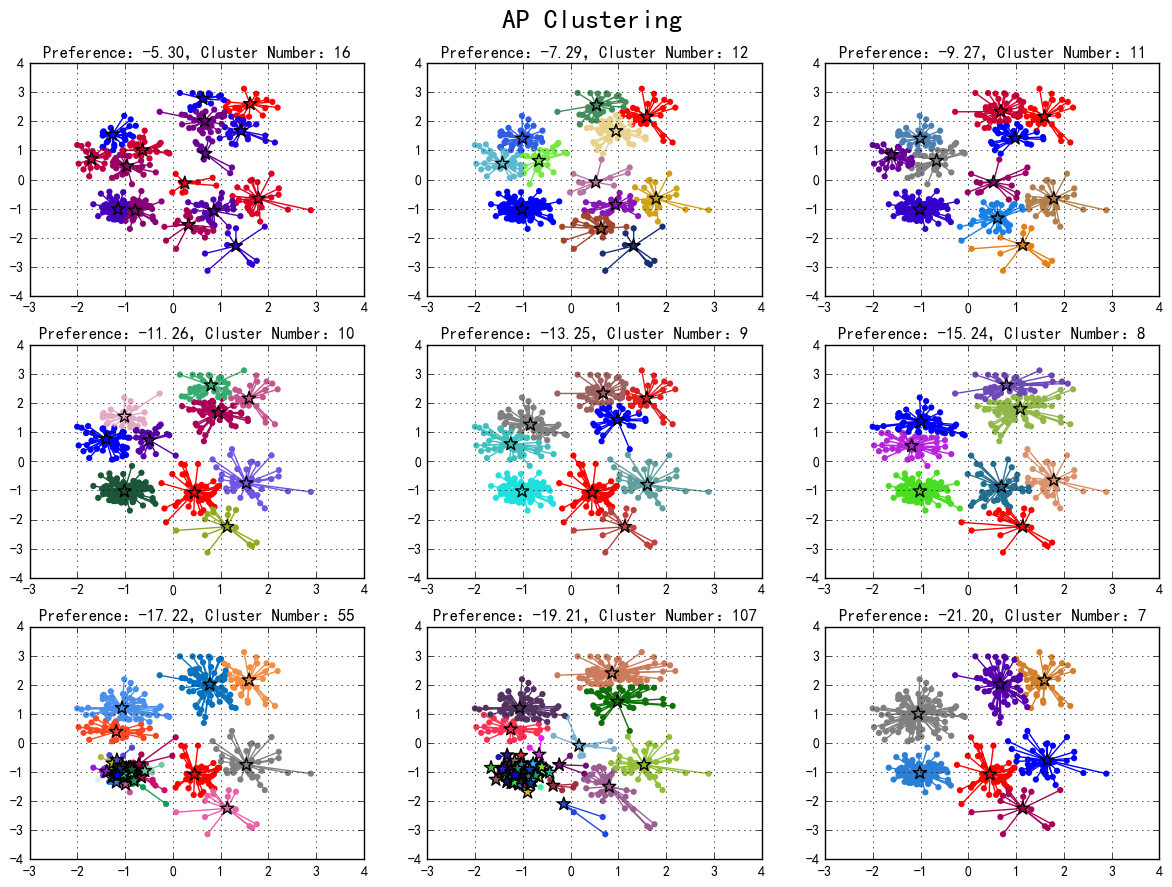

In [35]:
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 9), facecolor='w')
for i, mul in enumerate(np.linspace(1, 4, 9)):
    print (mul)
    p = mul * preference
    model = AffinityPropagation(affinity='euclidean', preference=p)
    # model fit
    af = model.fit(data)
    center_indices = af.cluster_centers_indices_
    n_clusters = len(center_indices)
    print ('p = %.1f' % mul), p, 'Cluster Number：', n_clusters
    y_hat = af.labels_

    plt.subplot(3, 3, i+1)
    plt.title(u'Preference：%.2f，Cluster Number：%d' % (p, n_clusters))
    clrs = []
    for c in np.linspace(16711680, 255, n_clusters):
        clrs.append('#%06x' % c.astype(np.int))
    # clrs = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
    for k, clr in enumerate(clrs):
        cur = (y_hat == k)
        plt.scatter(data[cur, 0], data[cur, 1], c=clr, edgecolors='none')
        center = data[center_indices[k]]
        for x in data[cur]:
            plt.plot([x[0], center[0]], [x[1], center[1]], color=clr, zorder=1)
    plt.scatter(data[center_indices, 0], data[center_indices, 1], s=100, c=clrs, marker='*', edgecolors='k', zorder=2)
    plt.grid(True)
plt.tight_layout()
plt.suptitle(u'AP Clustering', fontsize=20)
plt.subplots_adjust(top=0.92)
plt.show()


### Mean Shift

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import MeanShift
from sklearn.metrics import euclidean_distances

In [37]:
# simulate data
N = 1000
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)

5.31661129692
Band Width： 0.1 band width: 0.531661129692 Cluster Number： 7
['#ff0000', '#d4802a', '#aa0055', '#7f807f', '#5500aa', '#2a80d4', '#0000ff']
Band Width： 0.2 band width: 1.06332225938 Cluster Number： 4
['#ff0000', '#aa0055', '#5500aa', '#0000ff']
Band Width： 0.3 band width: 1.59498338907 Cluster Number： 3
['#ff0000', '#7f807f', '#0000ff']
Band Width： 0.4 band width: 2.12664451877 Cluster Number： 1
['#ff0000']


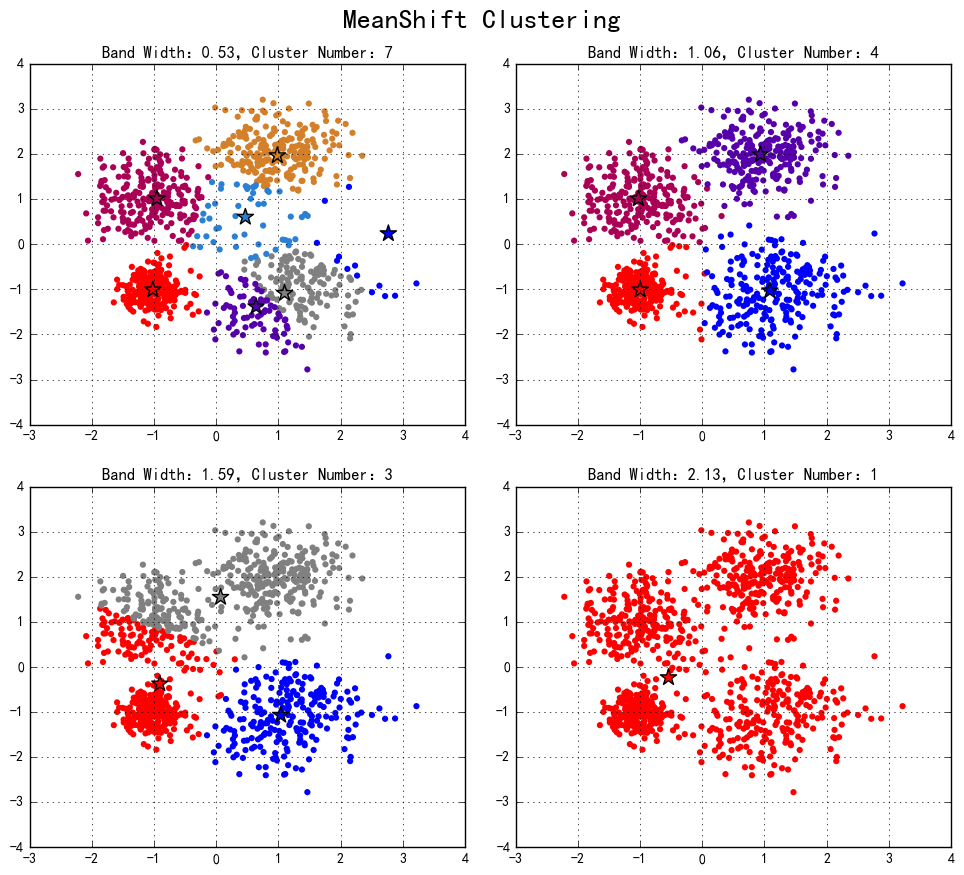

In [41]:
# plot   

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 9), facecolor='w')
m = euclidean_distances(data, squared=True)
bw = np.median(m)
print (bw)
for i, mul in enumerate(np.linspace(0.1, 0.4, 4)):
    band_width = mul * bw
    model = MeanShift(bin_seeding=True, bandwidth=band_width)
    ms = model.fit(data)
    centers = ms.cluster_centers_
    y_hat = ms.labels_
    n_clusters = np.unique(y_hat).size
    print ('Band Width：', mul, 'band width:', band_width, 'Cluster Number：', n_clusters)

    plt.subplot(2, 2, i+1)
    plt.title(u'Band Width：%.2f，Cluster Number：%d' % (band_width, n_clusters))
    clrs = []
    for c in np.linspace(16711680, 255, n_clusters):
        clrs.append('#%06x' % c.astype(np.int))
    # clrs = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
    print (clrs)
    for k, clr in enumerate(clrs):
        cur = (y_hat == k)
        plt.scatter(data[cur, 0], data[cur, 1], c=clr, edgecolors='none')
    plt.scatter(centers[:, 0], centers[:, 1], s=150, c=clrs, marker='*', edgecolors='k')
    plt.grid(True)
plt.tight_layout(2)
plt.suptitle(u'MeanShift Clustering', fontsize=20)
plt.subplots_adjust(top=0.92)
plt.show()


### Density Based Spatial Clustering of Applications with Noise(DBSCAN)

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

In [48]:
# simulate data
N = 1000
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)
print('Original Data:\n', data[:10])
data = StandardScaler().fit_transform(data)
print('Scaled Data: \n', data[:10])
# help(StandardScaler) # Standardize features by removing the mean and scaling to unit variance

Original Data:
 [[ 0.47572352  1.28999103]
 [ 1.88202617  2.2000786 ]
 [-1.24789775  1.60828886]
 [-0.47080224 -1.4027196 ]
 [-1.36543679  0.17914839]
 [ 1.64498588 -0.67742987]
 [ 2.12965448  1.97887142]
 [-1.55990101 -0.89962524]
 [-1.096229   -0.38334371]
 [ 0.91023062 -1.1902401 ]]
Scaled Data: 
 [[ 0.41989283  0.74498461]
 [ 1.65655531  1.39504751]
 [-1.09581059  0.97234032]
 [-0.41245495 -1.17838116]
 [-1.19917108 -0.04847485]
 [ 1.44810883 -0.66031679]
 [ 1.87431258  1.23704229]
 [-1.37017737 -0.81902785]
 [-0.96243742 -0.45025513]
 [ 0.80198599 -1.02661001]]


[-1  0  1  2  3] Cluster Number： 4
[-1  0  1  2  3] Cluster Number： 4
[-1  0  1  2  3  4] Cluster Number： 5
[-1  0] Cluster Number： 1
[-1  0  1] Cluster Number： 2
[-1  0  1  2  3] Cluster Number： 4


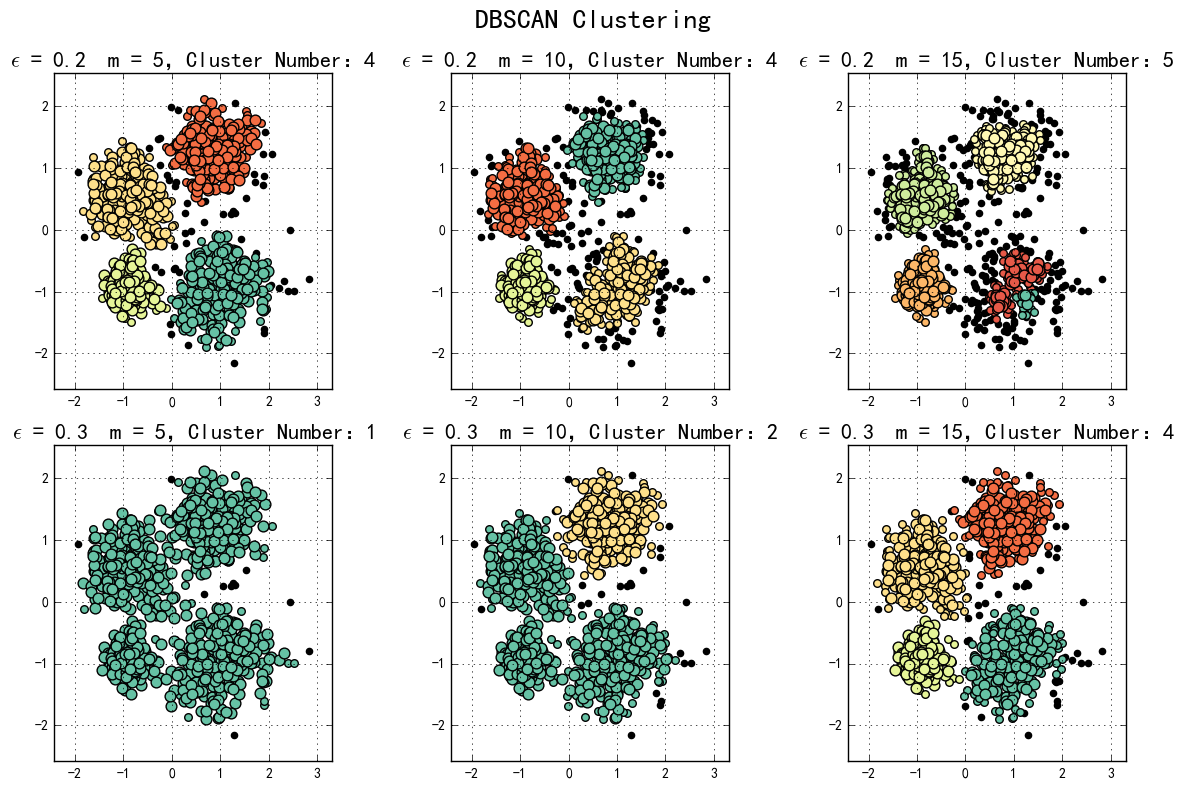

In [62]:


# parameters：(epsilon, min_sample)
params = ((0.2, 5), (0.2, 10), (0.2, 15), (0.3, 5), (0.3, 10), (0.3, 15))

# plot
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 8), facecolor='w')
plt.suptitle(u'DBSCAN Clustering', fontsize=20)

# iterate through all 6 pairs of epsilon and min_sample pairs
for i in range(6):
    eps, min_samples = params[i]
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(data)
    y_hat = model.labels_

    core_indices = np.zeros_like(y_hat, dtype=bool)
    core_indices[model.core_sample_indices_] = True

    y_unique = np.unique(y_hat)
    n_clusters = y_unique.size - (1 if -1 in y_hat else 0)
    print (y_unique, 'Cluster Number：', n_clusters)

    # clrs = []
    # for c in np.linspace(16711680, 255, y_unique.size):
    #     clrs.append('#%06x' % c.astype(np.int))
    plt.subplot(2, 3, i+1)
    clrs = plt.cm.Spectral(np.linspace(0, 0.8, y_unique.size))
    for k, clr in zip(y_unique, clrs):
        cur = (y_hat == k)  # data index for cluster k 
        # print('clrs:\n', clrs)
        if k == -1:
            plt.scatter(data[cur, 0], data[cur, 1], s=20, c='k')
            continue
        plt.scatter(data[cur, 0], data[cur, 1], s=30, c=clr, edgecolors='k')
        plt.scatter(data[cur & core_indices][:, 0], data[cur & core_indices][:, 1], s=60, c=clr, marker='o', edgecolors='k')
    x1_min, x2_min = np.min(data, axis=0)
    x1_max, x2_max = np.max(data, axis=0)
    x1_min, x1_max = expand(x1_min, x1_max)
    x2_min, x2_max = expand(x2_min, x2_max)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.grid(True)
    plt.title(u'$\epsilon$ = %.1f  m = %d，Cluster Number：%d' % (eps, min_samples, n_clusters), fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


### Spectral Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import spectral_clustering
from sklearn.metrics import euclidean_distances

def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

In [2]:

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

t = np.arange(0, 2*np.pi, 0.1)

data1 = np.vstack((np.cos(t), np.sin(t))).T
data2 = np.vstack((2*np.cos(t), 2*np.sin(t))).T
data3 = np.vstack((3*np.cos(t), 3*np.sin(t))).T
data = np.vstack((data1, data2, data3))

n_clusters = 3
m = euclidean_distances(data, squared=True)
sigma = np.median(m)

    

0.01
0.0251188643151
0.063095734448
0.158489319246
0.398107170553
1.0


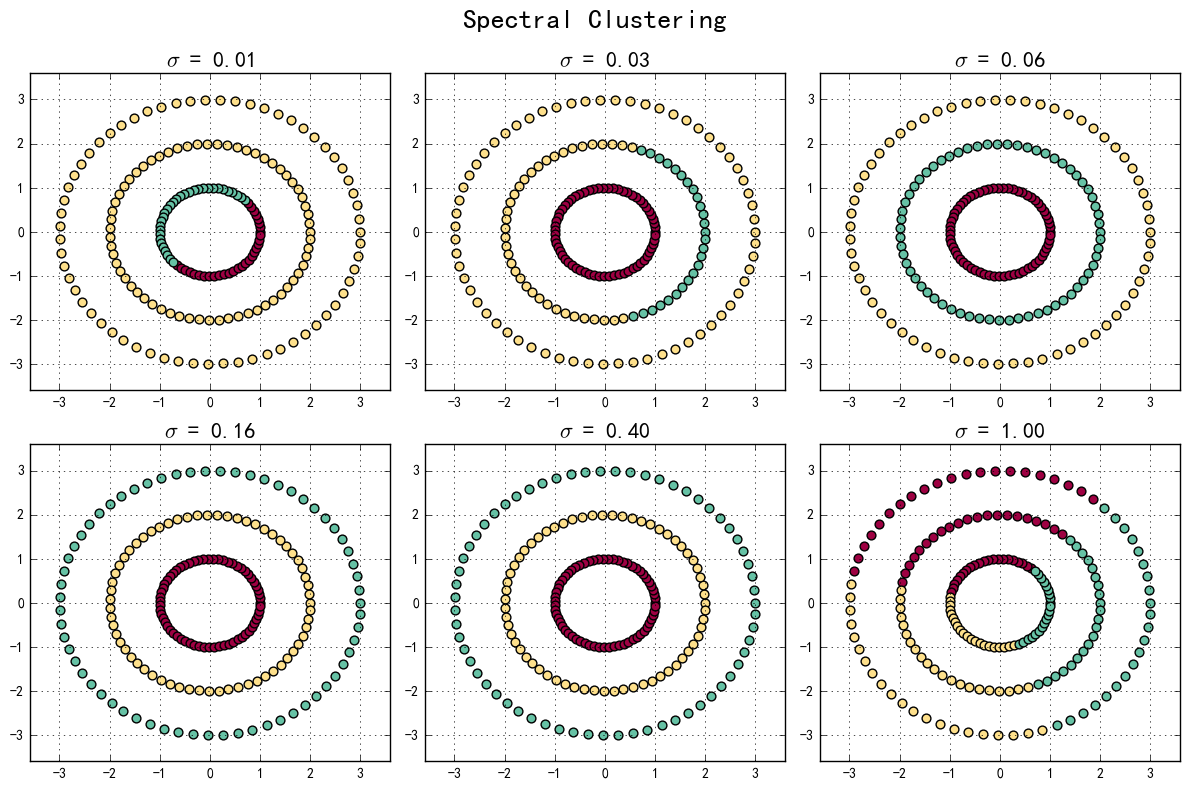

In [3]:
plt.figure(figsize=(12, 8), facecolor='w')
plt.suptitle(u'Spectral Clustering', fontsize=20)
clrs = plt.cm.Spectral(np.linspace(0, 0.8, n_clusters))
for i, s in enumerate(np.logspace(-2, 0, 6)):
    print (s)
    af = np.exp(-m ** 2 / (s ** 2)) + 1e-6
    y_hat = spectral_clustering(af, n_clusters=n_clusters, assign_labels='kmeans', random_state=1)
    plt.subplot(2, 3, i+1)
    for k, clr in enumerate(clrs):
        # print('k:\n', k)
        cur = (y_hat == k)
        plt.scatter(data[cur, 0], data[cur, 1], s=40, c=clr, edgecolors='k')
    x1_min, x2_min = np.min(data, axis=0)
    x1_max, x2_max = np.max(data, axis=0)
    x1_min, x1_max = expand(x1_min, x1_max)
    x2_min, x2_max = expand(x2_min, x2_max)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.grid(True)
    plt.title(u'$\sigma$ = %.2f' % s, fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image
from PIL import Image
import time

Start Spectral Clustering
Spectral Clustering Done


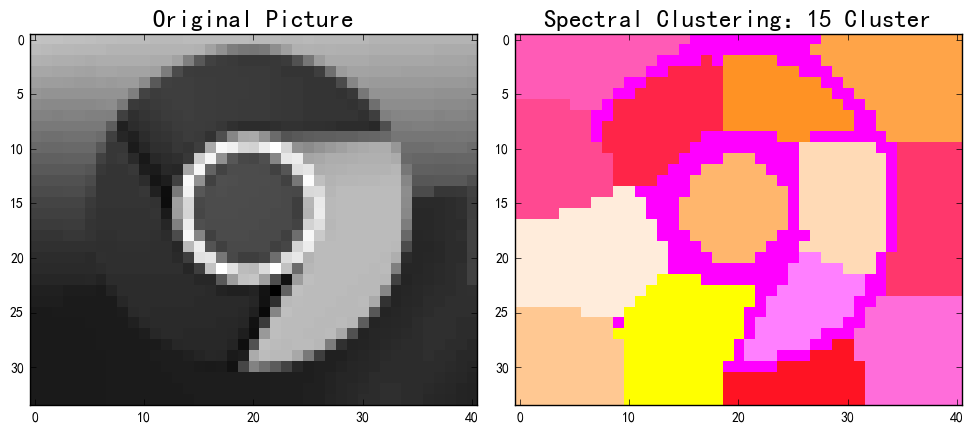

In [7]:

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

pic = Image.open('Data-and-Output/16.Chrome.png')
pic = pic.convert('L') # translate a color image to black and white (mode "L")
# help(pic.convert)
data = np.array(pic).astype(np.float) / 255

plt.figure(figsize=(10, 5), facecolor='w')
plt.subplot(121)
plt.imshow(pic, cmap=plt.cm.gray, interpolation='nearest')
plt.title(u'Original Picture', fontsize=18)
n_clusters = 15

affinity = image.img_to_graph(data)
beta = 3
affinity.data = np.exp(-beta * affinity.data / affinity.data.std()) + 10e-5
# a = affinity.toarray()
# b = np.diag(a.diagonal())
# a -= b
print ('Start Spectral Clustering')
y = spectral_clustering(affinity, n_clusters=n_clusters, assign_labels='kmeans', random_state=1)
print ('Spectral Clustering Done')
y = y.reshape(data.shape)
for n in range(n_clusters):
    data[y == n] = n
plt.subplot(122)
clrs = []
for c in np.linspace(16776960, 16711935, n_clusters):
    clrs.append('#%06x' % c.astype(np.int))
cm = matplotlib.colors.ListedColormap(clrs)
plt.imshow(data, cmap=cm, interpolation='nearest')
plt.title(u'Spectral Clustering：%d Cluster' % n_clusters, fontsize=18)
plt.tight_layout()
plt.show()
